[2] 채용공고 정보수집 @조성현 @최희재 
"text공고", "image공고" 모두 공통적으로 "기업정보 추출" [기업 형태, 사원수, 산업(업종), 설립년도, 매출액]

"text공고->정보추출"와 "image공고->URL"를 분류하여 가져온다.

"text 공고" (id="dev-template-v2-part"/ tag=p,li)

담당업무(=주요업무)

*자격요건

우대사항(=우대조건)

근무조건(=근무환경)

복지 및 혜택(=복지환경)

In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import numpy as np
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException

1. 잡코리아 접속

In [27]:
url = "https://www.jobkorea.co.kr/recruit/joblist?menucode=local&localorder=1"
driver = webdriver.Chrome(service=Service("../drive/chromedriver"))

driver.get(url)
driver.maximize_window() #창 크기 최대화
time.sleep(1)

KeyboardInterrupt: 

2. 잡코리아 검색창에 "로봇 소프트웨어" 검색
<br></br>
 : 검색어를 "로봇 소프트웨어"로 한정한 이유는 로봇 기구 설계, 영업사원 등등 단순 "로봇"이라고 검색했을 때 찾고자 하는 포지션이 아닌 경우가 많으므로 검색어를 "로봇 소프트웨어"로 한정.

In [5]:
main_bar = driver.find_element(By.CLASS_NAME, "smKey")
search_bar = main_bar.find_element(By.ID, "stext")

# "로봇 소프트웨어" 검색창에 입력
search_bar.send_keys("로봇 소프트웨어")

# 클릭
main_bar.find_element(By.ID, "common_search_btn").click()


3. 총 검색된 갯수파악 & 몇 페이지까지 공고가 있는지 미리 확인

In [6]:
# main_page 핸들 저장(뒤에서사용)
main_page = driver.find_element(By.ID, "dev-content-wrap")
#
#total_search_num = int(main_page.find_element(By.CLASS_NAME, "util-total-count").get_attribute("total-count"))
#print(type(total_search_num), total_search_num)
#
## 각페이지당 20개씩의 공고
#repeat_num = round(total_search_num/20)  # 총갯수/각페이지20개 를 반올림하여 반복횟수 확인
#print(repeat_num)

In [7]:
# //*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[1]/div[1]/a
# //*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[2]/div[1]/a
# //*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[3]/div[1]/a

In [8]:
# 현재 사용하고 있는 class
# common_info_title : tbCol coInfo
# common_info_ = tbList

# 한화 : //*[@id="tab04"]/article[1]/div/div[2]   //*[@id="tab04"]/article[1]/div/div[2]/dl
# 레인보우 :
# 세종 :


# //*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[1]/div[1]/a

In [9]:
#recruit = driver.find_elements(By.CLASS_NAME, "information-title")
#recruit[2].click()

# recruit[idx].click() 으로 들어가실 수 있습니다

In [10]:
for idx in range(1,10):
    
    if idx == 1:
        print("1")
        continue
    elif idx == 2:
        print("2")
        continue
    ###########################################################################
    if idx >= 6:
        print(idx)

1
2
6
7
8
9


4. 각 페이지 20개의 공고별 클릭하여 "공통적인 기업정보 추출" 
<br>[ 기업 형태, 사원수, 산업(업종), 설립년도, 매출액 ]</br>

In [57]:
company_list = []
sector_list = []
employee_list = []
establish_list = []
company_type_list = []

company = np.nan
sector = np.nan
employee = np.nan
establish = np.nan
type = np.nan

for num in range(1, 21):
    print(f"######## {num}번째 공고문 ########")
    time.sleep(1)
    company_title_link = f"""//*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[{num}]/div[1]/a"""
    
    time.sleep(1)
    info_title = main_page.find_element(By.XPATH, company_title_link)
    time.sleep(1)
    info_title.click()
 
    #현재 창들의 핸들을 저장 (기존 창과 새 창 모두 포함)
    handles = driver.window_handles

    #첫 번째 창 핸들 (기존 창)
    original_window = driver.current_window_handle

    ##########################################################
    #num 값으로 window창을 변경하여 "기업정보 추출"가져옴!
    time.sleep(1)
    driver.switch_to.window(handles[1])

    time.sleep(1)
    try:                                   
        common_info_title = driver.find_element(By.XPATH, """//*[@id="tab03"]/article[1]/div/div[2]""")
        common_info_list = driver.find_element(By.XPATH, """//*[@id="tab03"]/article[1]/div/div[2]/dl""")

        #if num == 13:
        #    common_info_title = driver.find_element(By.XPATH, """//*[@id="tab04"]/article[1]/div/div[2]""")
        #    common_info_list = driver.find_element(By.XPATH, """//*[@id="tab04"]/article[1]/div/div[2]/dl""")
        # (1) 회사 이름
        company = common_info_title.find_element(By.CLASS_NAME, "hd_4").text
        company_list.append(company)

        common_info_dt = common_info_list.find_elements(By.TAG_NAME, "dt")
        common_info_dd = common_info_list.find_elements(By.TAG_NAME, "dd")
        
        list_count = len(common_info_dd)
        print("common_info 갯수 : ", len(common_info_dd))

        sector = np.nan
        employee = np.nan
        establish = np.nan
        type = np.nan

        # (2)산업 / (3)기업형태 / (4)사원수 / (5)설립
        for idx, row in zip(common_info_dt, common_info_dd):
            
            if idx.text == "산업":
                time.sleep(1)
                sector = row.find_element(By.TAG_NAME, "text").text
                print(sector)
                continue

            elif idx.text == "기업형태":
                time.sleep(1)
                type = row.text
                print(type)
                continue
            
            elif idx.text == "사원수":
                time.sleep(1)
                employee = row.find_element(By.CLASS_NAME, "tahoma").text
                print(employee)
                continue

            elif idx.text == "설립":
                time.sleep(1)
                establish = row.find_element(By.CLASS_NAME, "tahoma").text
                print(establish)
                continue

        print("[ 총 : ", sector, "|", type, "|", employee, "|", establish, "]")
        sector_list.append(sector)
        company_type_list.append(type)
        employee_list.append(employee)
        establish_list.append(establish)

    except NoSuchElementException as e:
        print(f"--{num}번째 공고 PASS--")
        
        # 창 닫기
        driver.close()
        time.sleep(1)
        
        # 다시 기존창으로!
        driver.switch_to.window(original_window)
        continue
    
    # 창 닫기
    driver.close()
    time.sleep(1)

    # 다시 기존창으로!
    driver.switch_to.window(original_window)
    time.sleep(1)


time.sleep(1)
driver.close()

######## 1번째 공고문 ########


WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=129.0.6668.70)
Stacktrace:
#0 0x5a26a090781a <unknown>
#1 0x5a26a05d5e50 <unknown>
#2 0x5a26a05bc8a8 <unknown>
#3 0x5a26a05bc783 <unknown>
#4 0x5a26a05d8142 <unknown>
#5 0x5a26a066829f <unknown>
#6 0x5a26a064a233 <unknown>
#7 0x5a26a0618093 <unknown>
#8 0x5a26a061909e <unknown>
#9 0x5a26a08cea7b <unknown>
#10 0x5a26a08d2a31 <unknown>
#11 0x5a26a08ba645 <unknown>
#12 0x5a26a08d35a2 <unknown>
#13 0x5a26a089f81f <unknown>
#14 0x5a26a08f6618 <unknown>
#15 0x5a26a08f67e2 <unknown>
#16 0x5a26a090660c <unknown>
#17 0x7c0a7a294ac3 <unknown>


In [82]:
# 한번 확인
print("회사 : ", company_list)
print("산업(업종) : ", sector_list)
print("기업형태 : ", company_type_list)
print("사원수 : ", employee_list)
print("설립일 : ", establish_list)

print(len(company_list), 
      len(sector_list), 
      len(company_type_list), 
      len(employee_list),
      len(establish_list))

회사 :  ['(주)우아한형제들', '㈜세종교육', '㈜디알텍', '현대자동차㈜', '레인보우로보틱스', '㈜디든로보틱스', '쉐코', '㈜칼만', '㈜영현로보틱스', '㈜로보터스', '㈜씨유박스', '㈜시스윈로보틱스', '대한상공회의소 부산인력개발원', '두산로보틱스', '두산로보틱스', '두산로보틱스', '두산로보틱스', '두산로보틱스', '두산로보틱스']
산업(업종) :  ['응용 소프트웨어 개발 및 공급업', '일반 교과 학원', '제약·보건·바이오', '승용차 및 기타 여객용 자동차 제조업', '산업용 로봇 제조업', '솔루션·SI·CRM·ERP', '산업용 로봇 제조업', '산업용 로봇 제조업', '기계·기계설비', '전기·전자·제어', '솔루션·SI·CRM·ERP', '컴퓨터·하드웨어·장비', '기타 기술 및 직업훈련학원', '산업용 로봇 제조업', '산업용 로봇 제조업', '산업용 로봇 제조업', '산업용 로봇 제조업', '산업용 로봇 제조업', '산업용 로봇 제조업']
기업형태 :  ['중견기업 (비상장)', '중소기업 (비상장)', '중소기업 (코스닥 상장)', '대기업 (코스피)', '중소기업 (코스닥)', '벤처기업 (-)', '중소기업 (비상장)', '중소기업 (-)', '중소기업 (비상장)', '벤처기업 (비상장)', '중소기업 (코스닥 상장)', '중소기업 (비상장)', '비영리법인 (-)', '대기업 (코스피)', '대기업 (코스피)', '대기업 (코스피)', '대기업 (코스피)', '대기업 (코스피)', '대기업 (코스피)']
사원수 :  ['2,010', '14', '339', '72,188', '86', nan, '14', nan, '6', '20', '120', '70', nan, '203', '203', '203', '203', '203', '203']
설립일 :  ['2011', '2013', '2000', '1967', '2011', nan, '2019', '2020', '2024', '2004', '2010', '20

In [83]:
# 프로젝트 시작
# DB 설계&제작 -> DB ED 다이아그램 그리기 -> 

# 발표 팁
# 책임자 : 후름+데이터 / 부책임자 : 내용 데이터 주기

In [ ]:
# 일단은 이렇게 가져오고... 가져올때는 사람인이랑 비교하여 중복되지 않게 가져와야함!
# comp_jkid : index
# comp_name : company
# comp_form : type
# sector : sector
# employee_num : employee
# establish : establish
# comp_url : -

5. 1번~20번까지의 번호로 이동 후 "공통적인 기업정보 추출" 

In [203]:
url = "https://www.jobkorea.co.kr/recruit/joblist?menucode=local&localorder=1"
URL = "https://www.jobkorea.co.kr/Recruit/GI_Read/45446207?Oem_Code=C1&logpath=1&stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&listno=5"
driver = webdriver.Chrome(service=Service("../drive/chromedriver"))

driver.get(url)
driver.maximize_window() #창 크기 최대화
time.sleep(1)

In [204]:
main_bar = driver.find_element(By.CLASS_NAME, "smKey")
search_bar = main_bar.find_element(By.ID, "stext")

# "로봇 소프트웨어" 검색창에 입력
search_bar.send_keys("로봇 소프트웨어")

# 클릭
main_bar.find_element(By.ID, "common_search_btn").click()


In [ ]:
# URL 뒤에 번호만 바뀜!
# https://www.jobkorea.co.kr/Search/?stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&tabType=recruit&Page_No=1
# https://www.jobkorea.co.kr/Search/?stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&tabType=recruit&Page_No=3
# https://www.jobkorea.co.kr/Search/?stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&tabType=recruit&Page_No=12

In [205]:
# 다음 페이지로 이동!
home_search_page = "https://www.jobkorea.co.kr/Search/?stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&tabType=recruit&Page_No=1"

for i in range(1, 22):
    each_page = f"https://www.jobkorea.co.kr/Search/?stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&tabType=recruit&Page_No={i}"
    driver.get(each_page)
    time.sleep(3)


6. Homepage(url) 가져오기 추가!

In [64]:
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from tqdm import tqdm

In [67]:
URL = "https://www.jobkorea.co.kr/Recruit/GI_Read/45446207?Oem_Code=C1&logpath=1&stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&listno=5"
driver = webdriver.Chrome(service=Service("../drive/chromedriver"))

driver.get(URL)
driver.maximize_window() #창 크기 최대화
time.sleep(1)

In [72]:
url= """//*[@id="container"]/section/div[1]/article/div[2]/div[3]/dl/dd[5]/span/a"""

home_url = driver.find_element(By.ID, "container")
url = home_url.find_element(By.XPATH, """//*[@id="container"]/section/div[1]/article/div[2]/div[3]/dl/dd[5]/span/a""").get_attribute("href")
url

'http://www.rainbow-robotics.com/'

<h1>최종 정리</h1>

In [ ]:
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from tqdm import tqdm
import mysql.connector
import datetime
import re


# 키워드 리스트
#qualification_keywords = ['로보틱스', 'C', 'Python', 'QA', '자율주행', 'Lidar', '인공지능', 'ROS', 'ROS2', 'C++', 'Camera', 'Tracking', 'Deep Learning', 'Object Detection', 'Object Segmentation'
#          ,'석사','박사','리눅스','Linux','컴퓨터공학','소프트웨어공학','ADAS','센서','이미지센서','전기','전자','로봇공학','기계공학','임베디드','컴퓨터','자동차공학','학사','Matlab',
#          'Simulink','dSPACE','Vector','Tool','아키텍처','SW','신호처리','영상처리','딥러닝','센서퓨전','제어','마이크로프로세서','운영체제','전자회로','네트워크','동역학','프로젝트','영어',
#          '대회','센서','Radar','Platform', '회화', 'Embedded', '문서', '경로 계획', '커뮤니케이션', 'adas', 'AI','ML','DL', 'Geometry','데이터','수학','확률','통계','선형대수','클러스터링'
#          , '트리', '알고리즘', 'IT', 'DSP', 'RF','하드웨어','회로','석/박사', '전파','기능안전','펌웨어','Firmware','Safety','AUTOSAR','S/W','레이더','라이더','USPR','Rader', 'Optimization',
#          'camera','Localization','자료구조','운영체제','SLAM','IMU','프로그래밍','인프라','플랫폼', '시스템', '서비스', 'vehicle', 'SWITCH','ECU','Battery','Controller','ISO','CE','UL',
#          '3D','Robotics','기구 개발','Visual Odometry','Path Planning','Computer vision','Image processing','Architect','모빌리티', 'Modern', 'Semantic segmentation', 'Object detection'
#          ,'Navigation', '구동부','제어부','센서부', '영업', 'Control','Autonomous','Verification', 'Issue management', 'AV system', 'Mapping', '소통','3D Reconstruction']

# SQL 실행
remote = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)
mycursor = remote.cursor()
remote.autocommit = True  # 자동 업데이트

# 데이터 저장 리스트 초기화
sub_benefits = []
sub_post_url = []

# 드라이버 설정
driver = webdriver.Chrome(service=Service("/home/cho/pp_ws/drive/chromedriver"))

# 잡코리아 접속
url = "https://www.jobkorea.co.kr/recruit/joblist?menucode=local&localorder=1"
driver.get(url)
driver.maximize_window()

# 검색창에 "로봇 소프트웨어" 입력
search_bar = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "stext")))
search_bar.send_keys("로봇 소프트웨어 개발자")
driver.find_element(By.ID, "common_search_btn").click()

# 랜덤한 time.sleep() 정의
# time.sleep(random_time) 사용하기 : 아니면.. 막힘..
random_time_1_3 = np.random.uniform(1, 3)
random_time_3_5 = np.random.uniform(3, 5)

##########
#  Page  #
##########
for page_count in tqdm(range(1, 19)):  # Page 1~21
    print(f"[ {page_count}번째 Page 웹크롤링중... ]")
    common_info_benefit = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CLASS_NAME, "list")))

    for value in range(1, 21): # 각 페이지당 20개 조회해서 가져와야함
        
        ############################## company information collection[1] ##############################
        try:
            # Benefit
            benefit = common_info_benefit.find_element(By.XPATH, f"""//*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[{value}]/div[2]/ul[2]""").text
            
            # 이 부분은 benefit 문자열을 '\n#'로 분리하고 첫 번째 항목을 제외한 나머지를 추출
            benefit_list = benefit.split("\n")
            cleaned_benefit = ", ".join([b.strip().replace("#", "") for b in benefit_list])  # strip() 공백 제거 후, join()으로 쉼표로 연결, "#"은 replace로 제거
            sub_benefits.append(cleaned_benefit)

        except:
            sub_benefits.append(np.nan)
            pass


        try:           
            # Post_url
            each_url_xpath = f"""//*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[{value}]/div[2]/div/a"""
            
            post_url = common_info_benefit.find_element(By.XPATH, each_url_xpath).get_attribute("href")
            sub_post_url.append(post_url)

        except:
            pass


    each_page = f"https://www.jobkorea.co.kr/Search/?stext=%EB%A1%9C%EB%B4%87%20%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4&tabType=recruit&Page_No={page_count}"
    driver.get(each_page)

    # 랜덤 스크롤 동작
    time.sleep(random_time_1_3)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight / 3);")
    time.sleep(random_time_1_3)

    #################
    # 조회할 공고 갯수 #
    ################# 
    for num in range(1, 21):  # 각 페이지당 20개
        try:
            company_title_link = f"""//*[@id="dev-content-wrap"]/article/section[1]/article[2]/article[{num}]/div[1]/a"""
            info_title = WebDriverWait(driver, random_time_1_3).until(EC.presence_of_element_located((By.XPATH, company_title_link)))

            # JavaScript를 사용하여 클릭
            try:
                driver.execute_script("arguments[0].click();", info_title)
            except ElementClickInterceptedException:
                print(f"{num}번째 공고 클릭이 차단되었습니다. 재시도합니다.")
                time.sleep(random_time_1_3)  # 잠시 대기 후 재시도
                driver.execute_script("arguments[0].click();", info_title)

            # 새 창으로 전환
            WebDriverWait(driver, 10).until(EC.number_of_windows_to_be(2))
            driver.switch_to.window(driver.window_handles[1])

            ############################## company information collection[2] ##############################
            try:
                common_info_all = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.ID, "container")))
                common_info_comp = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, """//*[@id="tab03"]/article[1]/div/div[2]""")))
                common_info_uniq = driver.find_element(By.XPATH, """//*[@id="tab03"]/article[1]/div/div[2]/p""")
                common_info_list = driver.find_element(By.XPATH, """//*[@id="tab03"]/article[1]/div/div[2]/dl""") # tbList
                common_info_dt = common_info_list.find_elements(By.TAG_NAME, "dt")
                common_info_dd = common_info_list.find_elements(By.TAG_NAME, "dd")
                common_info_topmenu = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CLASS_NAME, "artReadJobSum")))
                common_info_tab01 = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.ID, "tab01")))

                # Posting
                posting = driver.find_element(By.CLASS_NAME, "hd_3").text
                cleaned_posting = posting.split("닫기", 1)[1].strip()  # '닫기' 이후의 텍스트 추출

                # Homepage URL
                homepage_url = common_info_all.find_element(By.XPATH, """//*[@id="container"]/section/div[1]/article/div[2]/div[3]/dl/dd[5]/span/a""").get_attribute("href")

                # Unique ID(고유 아이디)
                unique_ID = []

                unique_info = common_info_uniq.find_element(By.TAG_NAME, "a").get_attribute("href")

                company_match = re.search(r'Company/(\d+)', unique_info)
                c_match = re.search(r'C/(\d+)', unique_info)            

                if company_match:
                    unique_ID.append(company_match.group(1))
                if c_match:
                    unique_ID.append(c_match.group(1))

                # Company_name
                company_name = common_info_comp.find_element(By.CLASS_NAME, "hd_4").text
           
                # Sector, Employee, Establish, Comp_Type
                sector, employee, establish, comp_type = (np.nan, np.nan, np.nan, np.nan)
                for idx, row in zip(common_info_dt, common_info_dd):
                    time.sleep(random_time_1_3)
                    if idx.text == "산업":
                        sector = row.text
                    elif idx.text == "기업형태":
                        comp_type = row.text
                    elif idx.text == "사원수":
                        employee = row.text
                    elif idx.text == "설립":
                        establish = row.text.split("년")[0].strip()
                        
                # All_text(자격요건&우대사항)
                skill_text = common_info_topmenu.text
                required_plus_text = common_info_tab01.text

                qualificate = np.nan 
                all_text = skill_text.strip() + " " + required_plus_text.strip()


                ################################## Modification ########################################
                # 데이터베이스에 INSERT전 데이터 타입 및 수정
                #(1) benefits
                benefits = []
                b_filter = []
                b_filter.append(sub_benefits[num-1])
                
                if isinstance(b_filter[0], str):
                    benefits.append(','.join(sub_benefits[num-1].split(',')))
                else:
                    benefits.append("-")

                benefits_string = ', '.join(benefits) 

                #(2) post url
                post_url_value = sub_post_url[num-1]

                #(3) establish_date
                establish_date = datetime.date(int(establish), 1, 1)

                #(4) Employee
                employee_num = int(employee.replace(",", "").replace("명", ""))

                # (5) Unique ID (리스트의 첫 번째 요소만 사용)
                if unique_ID:
                    unique_ID_value = unique_ID[0]
                
                ###################################### Query ##########################################
                # 회사의 comp_name으로 DB에서 comp_id를 조회합니다.
                
                try:
                    company_name_replaced = re.sub(r"\(주\)|주식회사", "", company_name).strip()
                    mycursor.execute("SELECT comp_id, comp_name FROM company WHERE comp_name like %s", ('%' + company_name_replaced + '%',))
                    result = mycursor.fetchall()
                    
                    try:
                    
                        # 조회된 결과가 존재하면 comp_id를 설정합니다.
                        if result:
                            if len(result) >= 2:
                                print(f"{len(result)}번 중복되는 공고 회사 : {company_name}")
                                continue

                            else:
                                # 존재하면 comp_id를 설정합니다.
                                comp_id = result[0][0]
                                mycursor.execute("""INSERT into recruit 
                                         (comp_id, post_title, post_url, post_txt)
                                         VALUES (%s,%s,%s,%s)""",
                                         (comp_id, cleaned_posting, post_url_value, all_text))

                        else:
                            # SQL 쿼리문 실행하여 "company" table에 각각 알맞게 데이터베이스에 INSERT
                            mycursor.execute("""INSERT INTO company 
                                             (comp_name, comp_form, sector, employee_num, establish, benefits, comp_url, comp_sid)
                                             VALUES (%s, %s, %s, %s, %s, %s, %s, %s)""", 
                                            (company_name, comp_type, sector, employee_num, establish_date, benefits_string, homepage_url, unique_ID_value))

                            mycursor.execute("SELECT comp_id FROM company WHERE comp_sid = %s", (unique_ID_value,))
                            idid = mycursor.fetchone()
                            print(idid)

                            mycursor.execute("""INSERT into recruit 
                                         (comp_id, post_title, post_url, post_txt)
                                         VALUES (%s,%s,%s,%s)""",
                                         (idid[0], cleaned_posting, post_url_value, all_text))

                        # 모든 데이터 삽입 후에 커밋
                        remote.commit()

                    except mysql.connector.Error as err:
                        print(f"{company_name} 공고 : {err}")
                        time.sleep(2)  # 짧은 시간 대기 후 재시도
                
                except mysql.connector.Error as err:
                    print(f"Error: {err}")
                    # 예외 발생 시 필요한 추가 처리
                
                finally:
                    mycursor.reset()  # 커서 리셋


            except TimeoutException:
                print(f"---- {page_count}페이지 {num}번째 공고 PASS ----")


            finally:
                # 창 닫기 및 원래 창으로 복귀
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
                time.sleep(random_time_1_3)

        except (NoSuchElementException, TimeoutException) as e:
            # 예외가 발생하면 NaN 값을 추가하여 리스트 길이를 맞춥니다
            print(f"---- {page_count}페이지 {num}번째 공고 PASS ----: {str(e)}")
            

# 드라이버 종료
driver.quit()

---- 17페이지 20번째 공고 PASS ----


 94%|█████████▍| 17/18 [1:27:15<04:56, 296.63s/it]

[ 18번째 Page 웹크롤링중... ]
---- 18페이지 1번째 공고 PASS ----
---- 18페이지 2번째 공고 PASS ----
---- 18페이지 3번째 공고 PASS ----
---- 18페이지 4번째 공고 PASS ----
---- 18페이지 5번째 공고 PASS ----
---- 18페이지 6번째 공고 PASS ----
---- 18페이지 7번째 공고 PASS ----
---- 18페이지 8번째 공고 PASS ----
---- 18페이지 9번째 공고 PASS ----
---- 18페이지 10번째 공고 PASS ----
---- 18페이지 11번째 공고 PASS ----
---- 18페이지 12번째 공고 PASS ----
---- 18페이지 13번째 공고 PASS ----
---- 18페이지 14번째 공고 PASS ----
---- 18페이지 15번째 공고 PASS ----
---- 18페이지 16번째 공고 PASS ----
---- 18페이지 17번째 공고 PASS ----
---- 18페이지 18번째 공고 PASS ----
---- 18페이지 19번째 공고 PASS ----


100%|██████████| 18/18 [1:31:53<00:00, 306.28s/it]

---- 18페이지 20번째 공고 PASS ----: Message: 
Stacktrace:
#0 0x5da6e8eae81a <unknown>
#1 0x5da6e8b7ce50 <unknown>
#2 0x5da6e8bcc644 <unknown>
#3 0x5da6e8bcc931 <unknown>
#4 0x5da6e8c12534 <unknown>
#5 0x5da6e8bf14bd <unknown>
#6 0x5da6e8c0f9c6 <unknown>
#7 0x5da6e8bf1233 <unknown>
#8 0x5da6e8bbf093 <unknown>
#9 0x5da6e8bc009e <unknown>
#10 0x5da6e8e75a7b <unknown>
#11 0x5da6e8e79a31 <unknown>
#12 0x5da6e8e61645 <unknown>
#13 0x5da6e8e7a5a2 <unknown>
#14 0x5da6e8e4681f <unknown>
#15 0x5da6e8e9d618 <unknown>
#16 0x5da6e8e9d7e2 <unknown>
#17 0x5da6e8ead60c <unknown>
#18 0x793c1ea94ac3 <unknown>



In [14]:
remote.close()

In [ ]:
##################### Test 쿼리 #####################
#####comp_id로 recruit table 삭제 코드(578~838)####
import mysql.connector

# 데이터베이스 연결
connection = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)

cursor = connection.cursor()

for idx in range(947, 968):
    try:
        # 삭제할 recruit_id
        recruit_id_to_delete = idx
        print(f"{recruit_id_to_delete} 번 recruit_id 삭제 중...")

        # 자식 테이블에서 관련 데이터 삭제
        cursor.execute("DELETE FROM recruit_tech WHERE recruit_id = %s", (recruit_id_to_delete,))
        
        # 부모 테이블에서 데이터 삭제
        cursor.execute("DELETE FROM recruit WHERE recruit_id = %s", (recruit_id_to_delete,))

        # 변경 사항 저장
        connection.commit()
        print(f"레코드 {recruit_id_to_delete} 가 성공적으로 삭제되었습니다.")

    except mysql.connector.Error as err:
        print(f"오류 발생 (recruit_id {recruit_id_to_delete}): {err}")
        connection.rollback()  # 오류가 발생하면 롤백

# 커서 및 연결 종료
cursor.close()
connection.close()


947 번 recruit_id 삭제 중...
레코드 947 가 성공적으로 삭제되었습니다.
948 번 recruit_id 삭제 중...
레코드 948 가 성공적으로 삭제되었습니다.
949 번 recruit_id 삭제 중...
레코드 949 가 성공적으로 삭제되었습니다.
950 번 recruit_id 삭제 중...
레코드 950 가 성공적으로 삭제되었습니다.
951 번 recruit_id 삭제 중...
레코드 951 가 성공적으로 삭제되었습니다.
952 번 recruit_id 삭제 중...
레코드 952 가 성공적으로 삭제되었습니다.
953 번 recruit_id 삭제 중...
레코드 953 가 성공적으로 삭제되었습니다.
954 번 recruit_id 삭제 중...
레코드 954 가 성공적으로 삭제되었습니다.
955 번 recruit_id 삭제 중...
레코드 955 가 성공적으로 삭제되었습니다.
956 번 recruit_id 삭제 중...
레코드 956 가 성공적으로 삭제되었습니다.
957 번 recruit_id 삭제 중...
레코드 957 가 성공적으로 삭제되었습니다.
958 번 recruit_id 삭제 중...
레코드 958 가 성공적으로 삭제되었습니다.
959 번 recruit_id 삭제 중...
레코드 959 가 성공적으로 삭제되었습니다.
960 번 recruit_id 삭제 중...
레코드 960 가 성공적으로 삭제되었습니다.
961 번 recruit_id 삭제 중...
레코드 961 가 성공적으로 삭제되었습니다.
962 번 recruit_id 삭제 중...
레코드 962 가 성공적으로 삭제되었습니다.
963 번 recruit_id 삭제 중...
레코드 963 가 성공적으로 삭제되었습니다.
964 번 recruit_id 삭제 중...
레코드 964 가 성공적으로 삭제되었습니다.
965 번 recruit_id 삭제 중...
레코드 965 가 성공적으로 삭제되었습니다.
966 번 recruit_id 삭제 중...
레코드 966 가 성공적으로 삭제되었습니다.


In [ ]:
##################### Test 쿼리 #####################
#####단일 comp_id로 recruit table 삭제 코드(578)####
import mysql.connector

# 데이터베이스 연결
connection = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)

cursor = connection.cursor()

try:
    # 삭제할 recruit_id
    recruit_id_to_delete = 968  # 예시

    # 자식 테이블에서 관련 데이터 삭제
    cursor.execute("DELETE FROM recruit_tech WHERE recruit_id = %s", (recruit_id_to_delete,))

    # 부모 테이블에서 데이터 삭제
    cursor.execute("DELETE FROM recruit WHERE recruit_id = %s", (recruit_id_to_delete,))
    
    # 변경 사항 저장
    connection.commit()
    print("레코드가 성공적으로 삭제되었습니다.")

except mysql.connector.Error as err:
    print(f"오류 발생: {err}")
    connection.rollback()  # 오류가 발생하면 롤백

finally:
    cursor.close()
    connection.close()

레코드가 성공적으로 삭제되었습니다.


In [ ]:
##################### Test 쿼리 #####################
##### comp_id로 company table 삭제 코드(361~604) #####
# SQL 실행

import mysql.connector

remote = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)
mycursor = remote.cursor()


mycursor.execute("DELETE FROM company WHERE comp_id BETWEEN 1089 AND 1730;")

remote.commit()

In [ ]:
import mysql.connector

SW_keyword = [
    "소프트웨어", "SW", "로봇", "Robot", "로보틱스", "Robotics", "제어", "Control", 
    "설계", "자율주행로봇", "모바일로봇", "AMR", "AGV", "비전", "Vision", "SLAM", 
    "센서", "Sensor", "인식", "Perception", "경로계획", "Planning", "R&D", 
    "연구", "Research", "3D", "협동로봇", "휴머노이드", "ADAS", "Field"
]

# SQL 실행
remote = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)
mycursor = remote.cursor()

# 결과를 저장할 리스트
results = []

# 쿼리 실행 및 결과 저장
for idx in SW_keyword:
    mycursor.execute(f"""SELECT count(comp_id) FROM recruit WHERE post_txt like "%{idx}%";""")
    result = mycursor.fetchone()  # 결과 fetch
    results.append((idx, result[0]))  # 키워드와 해당 count를 튜플로 저장

# 숫자가 큰 순서대로 정렬
results.sort(key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
for keyword, count in results:
    print(f"Keyword: {keyword},{count}")


Keyword: 로봇,382
Keyword: 소프트웨어,275
Keyword: 설계,204
Keyword: 연구,201
Keyword: 제어,180
Keyword: SW,146
Keyword: Robot,103
Keyword: 비전,98
Keyword: 3D,90
Keyword: Vision,71
Keyword: 센서,62
Keyword: R&D,45
Keyword: 인식,39
Keyword: Robotics,37
Keyword: 로보틱스,34
Keyword: AMR,30
Keyword: AGV,27
Keyword: Control,25
Keyword: 협동로봇,22
Keyword: SLAM,21
Keyword: 자율주행로봇,14
Keyword: Sensor,13
Keyword: Planning,12
Keyword: Research,12
Keyword: Field,9
Keyword: 경로계획,6
Keyword: ADAS,6
Keyword: 모바일로봇,4
Keyword: Perception,3
Keyword: 휴머노이드,1


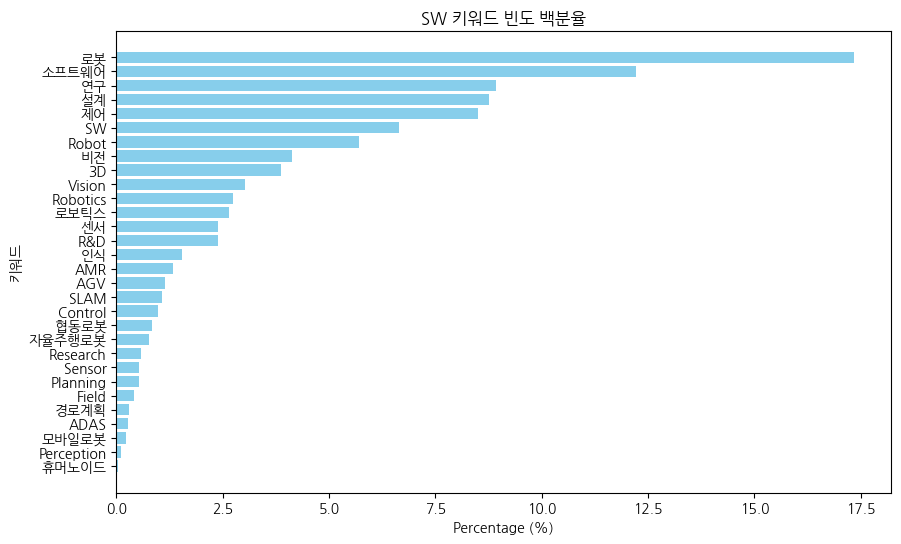

In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import font_manager, rc

# 키워드 리스트
SW_keyword = [
    "소프트웨어", "SW", "로봇", "Robot", "로보틱스", "Robotics", "제어", "Control", 
    "설계", "자율주행로봇", "모바일로봇", "AMR", "AGV", "비전", "Vision", "SLAM", 
    "센서", "Sensor", "인식", "Perception", "경로계획", "Planning", "R&D", 
    "연구", "Research", "3D", "협동로봇", "휴머노이드", "ADAS", "Field"
]

# MySQL 연결 설정
remote = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)
mycursor = remote.cursor()

# 결과 저장 리스트
results = []

# 쿼리 실행 및 결과 저장
for idx in SW_keyword:
    mycursor.execute(f"""SELECT count(comp_id) FROM recruit WHERE post_txt like "%{idx}%";""")
    result = mycursor.fetchone()  # 결과 fetch
    results.append((idx, result[0]))  # 키워드와 count를 튜플로 저장

# 총합 계산 (전체 count)
total_count = sum([count for _, count in results])

# 백분율로 변환
percentages = [(keyword, (count / total_count) * 100) for keyword, count in results]

# 백분율을 기준으로 내림차순 정렬
percentages.sort(key=lambda x: x[1], reverse=True)

# 키워드 및 백분율 리스트 분리
keywords = [item[0] for item in percentages]
counts = [item[1] for item in percentages]

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('키워드')  # 한국어로 설정
plt.title('SW 키워드 빈도 백분율')  # 제목도 한국어로 설정
plt.gca().invert_yaxis()  # 키워드 순서 뒤집기
plt.show()


In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import font_manager, rc
import pandas as pd

# MySQL 연결 설정
remote = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)
mycursor = remote.cursor()

mycursor.execute("SELECT * FROM national_pension_240924")

# 결과를 가져와서 pandas DataFrame으로 변환
columns = [col[0] for col in mycursor.description]  # 컬럼 이름 가져오기
df = pd.DataFrame(mycursor.fetchall())

# 연결 닫기
mycursor.close()
remote.close()

# DataFrame 출력
print(df)

             0                                                  1       2  3   \
0       2024-08                                            우성기전(주)  126811  1   
1       2024-08                                       서능공원묘지운영회(재)  102820  1   
2       2024-08                                            노들새마을금고  108820  1   
3       2024-08                                            유창성업(주)  122812  1   
4       2024-08                                            희성전자(주)  106810  1   
...         ...                                                ...     ... ..   
564828  2024-08      제이디에스피(주)-<건설일용>(주)티씬 김포 사옥 신축공사 중 금속/창호/유리공사  130865  1   
564829  2024-08  선구산업(주)/일용/평택 전자 P4 복합동 신축공사 중 P4 복합동 Ph.3 방수 ...  114812  1   
564830  2024-08        유덕환경(주)-(일용)부산부암동지역주택 오수중계펌프장 및 우수처리시설 공사현장  211862  1   
564831  2024-08             주식회사우리전력/일용/대구권광역철도 소방전기설비 신설 기타공사(3차)  502860  1   
564832  2024-08     주식회사에스엠강구조/일용/(주)베바스토코리아홀딩스 당진 제1공장 증축 및 대수선공사  826860  1   

           4               

In [ ]:
import mysql.connector


# MySQL 데이터베이스 연결 설정
remote = mysql.connector.connect(
    host = "*****",
    port = "****",
    user = "****",
    password = "****",
    database = "****"
)
remote.autocommit = True
# 쿼리를 버퍼링 처리해서 여러 행을 처리할 수 있도록 cursor 생성
cursor = remote.cursor(buffered=True)

# 중복된 회사 중 직원 수가 없는 경우와 이름을 찾지 못한 경우를 카운트하기 위한 변수 초기화
dup_noemp = 0
noname = 0

# 직원 수(employee_num) 또는 평균 급여(avg_salary)가 비어 있는 회사들을 조회""
cursor.execute("""SELECT comp_id, comp_name, employee_num, avg_salary
               FROM company 
               WHERE ((employee_num is null) OR (avg_salary is null))
               AND comp_id > 500""")
comps = cursor.fetchall()  # 결과를 comps 리스트에 저장

# 각 회사(comp)마다 데이터를 처리
for comp in comps:
    comp_id = comp[0]  # 회사 ID
    comp_name = comp[1]  # 회사 이름
    employee_num = comp[2]  # 직원 수
    avg_salary = comp[3]  # 평균 급여
    print("--------------------------------------------")

    # 회사 이름에서 "(주)" 또는 "주식회사"를 제거해 정제된 이름 생성
    if "(주)" in comp_name:
        comp_name_re = comp_name.replace("(주)", "").strip()
    elif "주식회사" in comp_name:
        comp_name_re = comp_name.replace("주식회사", "").strip()
    elif "㈜" in comp_name:
        comp_name_re = comp_name.replace("㈜", "").strip()
    else:
        comp_name_re = comp_name  # 위 조건이 없을 경우 원래 이름을 사용

    # 'national_pension_240924' 테이블에서 회사 이름이 유사한 데이터를 조회
    cursor.execute("""SELECT 사업장명, 가입자수, 당월고지금액 
                   FROM national_pension_240924 
                   WHERE 사업장명 like %s""", ('%' + comp_name_re + '%',))
    results = cursor.fetchall()  # 결과를 results에 저장

    # 해당하는 결과가 있을 경우 처리
    if results:
        print(results)
        # 직원 수가 있는 경우 처리
        if employee_num:
            for r in results:  # 조회된 결과에서 하나씩 비교
                np_employee_num = r[1]  # 국민연금 데이터의 가입자수
                np_month_money = r[2]  # 국민연금 데이터의 당월 고지 금액

                # 직원 수가 있으면 평균 급여를 계산
                if employee_num:
                    # 평균 급여 계산: (당월 고지 금액 / 직원 수 / 9) * 100 * 12 (연봉 환산)
                    np_avg_salary = int((((np_month_money / np_employee_num) / 9) * 100) * 12)
                    print(f"")

                    # 회사 테이블에 평균 급여를 업데이트
                    cursor.execute("""UPDATE company set avg_salary=%s WHERE comp_id=%s""", (np_avg_salary, comp_id))
                    print(f"success: {comp_id}, {comp_name}")  # 성공한 회사 정보 출력
                    break  # 하나의 결과로 평균 급여를 업데이트한 후 종료
        else:
            # 직원 수가 없는 경우, 중복된 회사로 처리하고 로그 출력
            print(f"Duplicate, no employee_num comp name: {comp_id}, {comp_name}")
            dup_noemp += 1  # 중복 카운트 증가
    else:
        # 일치하는 이름이 없는 경우 로그 출력하고 카운트 증가
        print(f"No such name: {comp_id}, {comp_name}")
        noname += 1  # 이름을 찾지 못한 경우 카운트 증가

# 중복된 경우와 이름을 찾지 못한 경우의 최종 카운트 출력
print(f"중복된 경우 : {dup_noemp}, 이름을 찾지 못함 : {noname}")

remote.commit()
remote.close()

--------------------------------------------
No such name: 671, ㈜영현로보틱스
--------------------------------------------
[('(주)한국데이터통신', Decimal('10'), Decimal('2812460'))]

success: 677, ㈜한국데이터통신
--------------------------------------------
[('(주)디스펙터', Decimal('8'), Decimal('3858560'))]

success: 678, ㈜디스펙터
--------------------------------------------
[('(주)로보티즈', Decimal('156'), Decimal('59872140'))]

success: 679, ㈜로보티즈
--------------------------------------------
[('애니모션텍(주)', Decimal('51'), Decimal('21428860'))]

success: 680, 애니모션텍㈜
--------------------------------------------
No such name: 681, ㈜엔티로봇
--------------------------------------------
[('(주)유진로봇', Decimal('175'), Decimal('71239980'))]

success: 682, ㈜유진로봇
--------------------------------------------
[('주식회사 와따에이아이', Decimal('26'), Decimal('10435400'))]

success: 683, ㈜와따에이아이
--------------------------------------------
[('주식회사 인티그리트', Decimal('23'), Decimal('8524180'))]

success: 684, ㈜인티그리트
------------------------------